In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from matplotlib.colors import ListedColormap

sns.set_style('whitegrid')
cmap = ListedColormap(['white', 'blue', 'red'])

32441

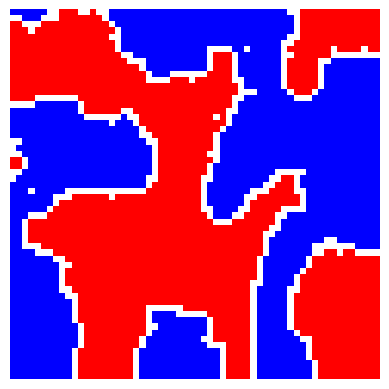

In [7]:
def update_step(net, b):
  nei_off = np.array([(0,1),(0,-1),(1,0),(-1,0),(1,1),(1,-1),(-1,-1),(-1,1)])
  count = 0
  for i in range(len(net)):
    for j in range(len(net)):
      if net[i,j] == 0:
        continue
      nei = nei_off + np.array([i,j])
      valid = np.array([(x,y) for x,y in nei if 0 <= x < len(net) and 0 <= y < len(net)])
      valid_nei  = [net[x, y] for x,y in valid]
      same = sum(v == net[i,j] for v in valid_nei)
      others = sum(v not in (0, net[i,j]) for v in valid_nei)
      total = same + others

      if others > 0 and ((same / total) < b):
        value = net[i, j].copy()
        idx = np.argwhere(net == 0)
        if len(idx) > 0:
          id  = np.random.choice(len(idx))
          net[i,j] = 0
          x, y = idx[id]
          net[x, y] = value
          count += 1

  return net, count







def Schelling_Model_of_Segregation_animation(b, r, frame=300, n=60):
  net_holder = {'net': np.random.choice([0, 1, 2], (n, n), p=[r, (1-r)/2, (1-r)/2]), 'count': 0}
  fig, ax = plt.subplots()
  img = ax.imshow(net_holder['net'], cmap=cmap)
  plt.axis('off')
  def update(frames, b):
    net_holder['net'], c = update_step(net_holder['net'], b)
    img.set_array(net_holder['net'])
    net_holder['count'] += c
    return img,

  ani = FuncAnimation(fig, update, frames = frame, interval=100,fargs=(b,))
  return HTML(ani.to_jshtml()), net_holder['count'], net_holder['net']


out, count, _ = Schelling_Model_of_Segregation_animation(b=0.75, r=0.1)
display(out)
count

In [ ]:
B = [0.25, 0.375, 0.5, 0.625, 0.75, 0.875]
mean_counts = []
for b in B :
  count = 0
  for i in range(5):
    ani, c, _= Schelling_Model_of_Segregation_animation(b=b, r=0.1, frame= int(400 * b))
    count += c
  mean_counts.append(count / 5)

plt.plot(B, mean_counts)
plt.xlabel('BM(threshold)')
plt.ylabel('mean counts')
plt.show()

<ipython-input-7-546da293a805>:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


In [ ]:
R = np.arange(0.05, 0.75, 0.1)
mean_counts_r = []
for r in R :
  count = 0
  for i in range(5):
    ani, c,_= Schelling_Model_of_Segregation_animation(b=0.7, r= r, frame= int(1000 * r))
    count += c
  mean_counts_r.append(np.mean(count))

plt.plot(R, mean_counts_r)
plt.xlabel('density of empty cells')
plt.ylabel('mean counts')
plt.show()

In [ ]:
def cluster_size(net, seen, i=0, j=0):
    count = 1
    seen.append((i, j))
    if i+1 < net.shape[0] and (i+1, j) not in seen and net[i+1, j] == net[i, j]:
        size, seen = cluster_size(net, seen, i=i+1, j=j)
        count += size
    if j+1 < net.shape[1] and (i, j+1) not in seen and net[i, j+1] == net[i, j]:
        size, seen = cluster_size(net, seen, i=i, j=j+1)
        count += size
    if i-1 >= 0 and (i-1, j) not in seen and net[i-1, j] == net[i, j]:
        size, seen = cluster_size(net, seen, i=i-1, j=j)
        count += size
    if j-1 >= 0 and (i, j-1) not in seen and net[i, j-1] == net[i, j]:
        size, seen = cluster_size(net, seen, i=i, j=j-1)
        count += size

    return count, seen

def all_clusters(net, seen):
    sizes = []
    for i in range(net.shape[0]):
        for j in range(net.shape[1]):
            if (i, j) not in seen and net[i, j] != 0:
                size, seen = cluster_size(net, seen, i=i, j=j)
                sizes.append(size)
    return np.array(sizes)


B = [0.25, 0.375, 0.5, 0.625, 0.75, 0.875]
R = [0.15, 0.25, 0.45 , 0.5]


for r in R:
  s = []
  for b in B:
    _, _, net= Schelling_Model_of_Segregation_animation(b=b, r= r, frame= int(1000 * r))
    nc = all_clusters(net, seen = [])
    S = 2 / (net.shape[0] * net.shape[1]*(1-r)) ** 2 * np.sum(nc ** 2)
    s.append(S)

  plt.plot(B, s)
  plt.title(f'density of empty cells = {r}')
  plt.xlabel('BM(threshold)')
  plt.ylabel('Segregation coeficient')
  plt.show()


